<a href="https://colab.research.google.com/github/rokzeezee/Machine-Learning-/blob/main/Decision_Tree_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df= pd.read_csv("/content/Decision_Tree_ Dataset.csv" , sep= "," , header = 0)

df = df.rename(columns={'1': 'Initial payment ', '2': 'Last Payment','3': 'Credit Score','4': 'House Number' , "Unnamed: 5"  : "Result"})


df.head(3)

,Initial payment,Last Payment,Credit Score,House Number,sum,Result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes


In [10]:
df.shape

(1000, 6)

In [12]:
#df[[i for i in df.columns if df[i].isnull().sum()]].isnull().sum()

Series([], dtype: float64)

In [46]:
df.describe()

,Initial payment,Last Payment,Credit Score,House Number,sum,Result_No,Result_yes
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,294.34300,12465.88400,528.042000,4027.011000,17315.280000,0.521000,0.479000
std,115.81539,1440.15617,259.796059,565.164179,1589.943875,0.499809,0.499809
min,100.00000,10005.00000,100.000000,3003.000000,13515.000000,0.000000,0.000000
25%,195.00000,11201.50000,302.000000,3545.000000,16073.750000,0.000000,0.000000
50%,289.50000,12450.00000,516.500000,4041.500000,17383.000000,1.000000,0.000000
75%,398.00000,13678.25000,753.500000,4507.000000,18595.250000,1.000000,1.000000
max,500.00000,14996.00000,997.000000,5000.000000,20737.000000,1.000000,1.000000


In [ ]:
#loan_encoding =  pd.get_dummies(df[["Result"]])
#loan_encoding_final = pd.concat([df,loan_encoding] ,1)
#loan_encoding_final.drop(["Result"] , axis=1) 
#df=loan_encoding_final.drop(["Result" , "Result_No"] , axis=1)

In [48]:
df.corr()

,Initial payment,Last Payment,Credit Score,House Number,sum,Result_No,Result_yes
Initial payment,1.000000,-0.016104,-0.011816,0.054740,0.075783,0.051555,-0.051555
Last Payment,-0.016104,1.000000,-0.004851,0.031158,0.914900,0.815272,-0.815272
Credit Score,-0.011816,-0.004851,1.000000,0.018323,0.164658,0.080067,-0.080067
House Number,0.054740,0.031158,0.018323,1.000000,0.390666,0.249218,-0.249218
sum,0.075783,0.914900,0.164658,0.390666,1.000000,0.843892,-0.843892
Result_No,0.051555,0.815272,0.080067,0.249218,0.843892,1.000000,-1.000000
Result_yes,-0.051555,-0.815272,-0.080067,-0.249218,-0.843892,-1.000000,1.000000


<Axes: >

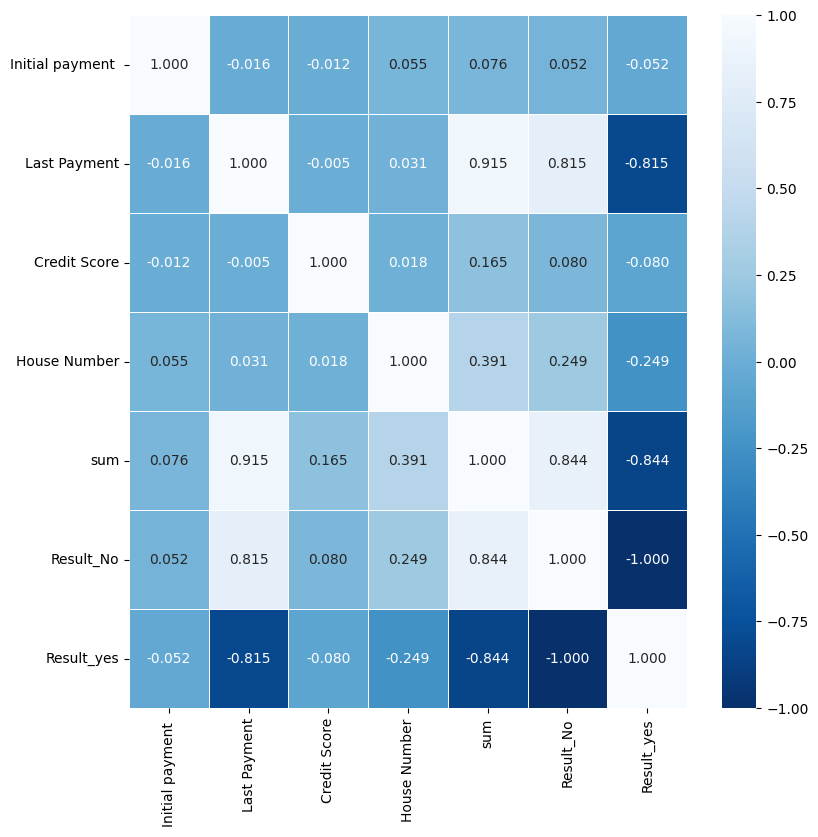

In [53]:
cor_mat=df.corr()
fig,ax=plt.subplots(figsize=(9,9))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f" , cmap = "Blues_r")

In [57]:
# Creating Features and Target variable
X = df.drop('Result_yes'  ,axis = 1)
y =df.Result_yes
     

In [68]:
X =df.values[:,0:4]
X.shape
y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Result_yes, Length: 1000, dtype: uint8

In [72]:
from sklearn.model_selection import train_test_split

X_train ,X_test , y_train ,y_test = train_test_split (X,y , test_size = 0.2 , random_state = 42)

In [73]:
X_train.shape ,X_test.shape , y_train.shape ,y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [76]:
 from sklearn.tree import DecisionTreeClassifier
 # function to perform traning with entropy 
 clf_entropy = DecisionTreeClassifier( criterion= "entropy" , random_state= 42, max_depth=3 ,min_samples_leaf= 5)
 clf_entropy.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [82]:
 clf_entropy_model =clf_entropy.fit(X_train , y_train)

In [86]:
pred =clf_entropy_model.predict(X_test)
pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1], dtype=uint8)

In [89]:
score = clf_entropy_model.score(X_test,y_test)

0.93

In [90]:
from sklearn.metrics import accuracy_score
score2 = accuracy_score(y_test,pred)
score2

0.93

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , pred)

cm

array([[99, 10],
       [ 4, 87]])

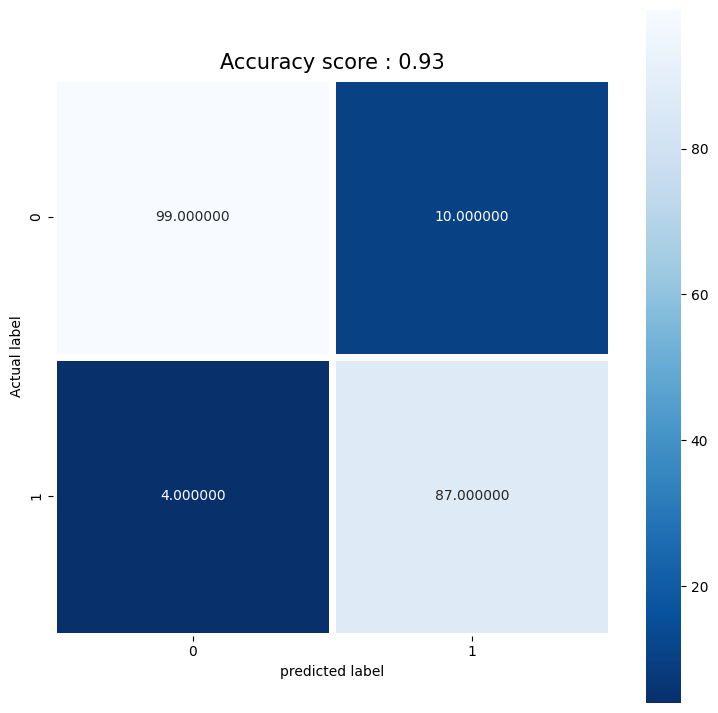

In [92]:
plt.figure(figsize=(9,9))
sns.heatmap(cm , annot=True ,fmt="3f" ,linewidths= 5, square = True ,cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel ("predicted label");
all_sample_title = "Accuracy score : {0}".format( score2);
plt.title(all_sample_title ,size = 15);


In [93]:
#extracting TN,TP,FP,FN
TN,TP,FP,FN = confusion_matrix (y_test,pred).ravel()
TN,TP,FP,FN 

(99, 10, 4, 87)

In [94]:
 from sklearn.metrics import classification_report
 cp = classification_report(y_test,pred)
 print("classification _report" ,cp )
 

classification _report               precision    recall  f1-score   support

           0       0.96      0.91      0.93       109
           1       0.90      0.96      0.93        91

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

